In [1]:
import pandas as pd
import numpy as np

# 0 Graph Basics

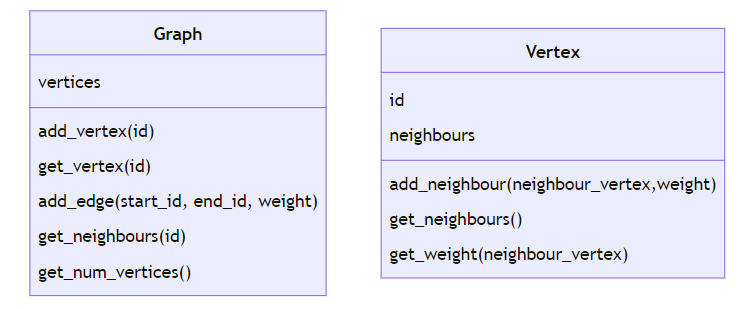

### Vertex 

The class `Vertex` has the following attributes:
- `id_`: to identify each vertex. This is of String data type.
- `neighbours`: which is a Dictionary where the keys are the neighbouring `Vertex` object instances that are connected to the current Vertex and the values are the weights of the edge between the current Vertex and the neighbouring vertices. 

The class has the following methods:
- `__init__(self, id_)`: which is used to initialized the attribute `id_`. By default, `id_` is set to an empty String . The attribute `neighbours` is always set to an empty dictionary.
- `add_neighbour(self, nbr_vertex, weight)`: which adds a neighbouring Vertex to the current Vertex. The second argument provides the weight of the edge between the current Vertex and the newly added neighbouring Vertex. By default, `weight` is `0`.
- `get_vertex_neigbours(self)`: which returns all the Vertices connected to the current Vertex as a list. The elements of the output list are of `Vertex` object instances.
- `get_weight(self, neighbour)`: which returns the weight of the requested neighbour. It should return `None` if the requested neighbour is not found.
- `__eq__(self, other)`: which returns true if the id of the current vertex object is the same as the `other` vertex's id. 
- `__lt__(self, other)`: which returns true if the id of the current vertex object is less than the `other` vertex's id.
- `__hash__(self)`: which calls the `hash()` function on `id_` and returns it. This allows the object to be a dictionary key. This is provided for you.
- `__str__(self)`: This method should return the id of the current vertex and a list of `id_`s of the neighbouring vertices, like `Vertex 2 is connected to: 3, 4, 5` .

In [2]:
class Vertex:
    def __init__(self, id_=""):
        self.id_ = id_
        self.neighbours = {}
    
    def add_neighbour(self, nbr_vertex, weight=0):
        self.neighbours[nbr_vertex] = weight
    
    def get_vertex_neighbours(self):
        return list(self.neighbours.keys())
    
    def get_weight(self, neighbour):
        if neighbour in self.neighbours.keys():
            return self.neighbours[neighbour]
        return None
    
    def __eq__(self, other):
        if self.id_ == other.id_: 
            return True
        return False

    def __lt__(self, other):
        if self.id_ < other.id_:
            return True
        return False

    def __hash__(self):
        return hash(self.id_)
    
    def __str__(self):
        my_string = f"Vertex {self.id_} is connected to: "
        my_neighbours = []
        for vertex in self.get_vertex_neighbours():
            my_neighbours.append(vertex.id_)
        my_string += ", ".join(my_neighbours)
        return my_string

In [3]:
v1 = Vertex("1")
v2 = Vertex("2")
v1.add_neighbour(v2, 3)
print(v1)

Vertex 1 is connected to: 2


In [4]:
v = Vertex()
v.add_neighbour(1)
v.add_neighbour(2)
v.add_neighbour(6)
v.get_vertex_neighbours()

v1 = Vertex("1")
assert v1.id_ == "1" and len(v1.neighbours) == 0
v2 = Vertex("2")
v1.add_neighbour(v2)
assert v1.get_vertex_neighbours()[0].id_ == "2" and v1.neighbours[v1.get_vertex_neighbours()[0]] == 0
v3 = Vertex("3")
v1.add_neighbour(v3, 3)
assert v1.get_weight(v3) == 3
v4 = Vertex("4")
assert v1.get_weight(v4) == None
assert v1 < v2
assert v1 != v2
assert str(v1) == "Vertex 1 is connected to: 2, 3"

### Graph

The class has the following attribute:
- `vertices`: which is a *dictionary* of Vertices. The keys are the `id`s of the Vertices and the values are `Vertex` object instances.

The class has the following property:
- `num_vertices`: which is a *computed* property that returns the number of vertices in the graph.

The class also has the following methods:
- `__init__(self)`: which initializes the graph with an empty dictionary.
- `_create_vertex(self, id_)`: which creates a new `Vertex` object with a given `id_`. This method is never called directly and is only used by `add_vertex(id_)`.
- `add_vertex(self, id_)`: which creates a new `Vertex` object, adding it into the dictionary `vertices`. The argument `id_` is a String. This method should call `_create_vertex(id_)`.
- `get_vertex(self, id_)`: which returns the `Vertex` object instance of the requested `id_`. The method should return `None` if the requested `id_` cannot be found. The argument `id_` is a String.
- `add_edge(start_v, end_v)`: which creates an edge from one Vertex to another Vertex. The arguments are the `id_`s of the two vertices and are both Strings.
- `get_neighbours(self, id_)`: which returns a list of `id_`s all the neighbouring vertices (of the specified Vertex `id_`). It should return `None` if `id_` cannot be found. The argument `id_` is a String and the elements of the output list are of `str` data type. 
- `__contains__(self, id_)`: which returns either `True` or `False` depending on whether the graph contains the specified Vertex's `id_`. The argument `id_` is a String.

In [5]:
class Graph:
    def __init__(self):
        self.vertices = {}
        
    def _create_vertex(self, id_):
        return Vertex(id_)

    def add_vertex(self, id_):
        self.vertices[id_] = self._create_vertex(id_)

    def get_vertex(self, id_):
        if id_ in self.vertices.keys():
            return self.vertices[id_]
        return None
        
    def add_edge(self, start_v, end_v, weight=0):
        if not start_v in self.vertices: 
            self.add_vertex(start_v)
        if not end_v in self.vertices: 
            self.add_vertex(end_v)
        v_start = self.vertices[start_v]
        v_end = self.vertices[end_v]
        v_start.add_neighbour(v_end)

    def get_neighbours(self, id_):
        vertex = self.get_vertex(id_)
        if vertex:
            return [neighbour.id_ for neighbour in vertex.get_vertex_neighbours()]
        return None
 
    def __contains__(self, id_):
        return (id_ in self.vertices)
    
    def __iter__(self):
        for k,v in self.vertices.items():
            yield v 

    @property        
    def num_vertices(self):
        return len(self.vertices)

In [6]:
# g = Graph()
# assert g.vertices == {} and g.num_vertices == 0
# g.add_vertex("A")
# g.add_vertex("B")
# g.add_vertex("C")
# g.add_vertex("D")
# g.add_vertex("E")
# g.add_vertex("F")
# assert g.num_vertices == 6
# assert "A" in g
# assert "B" in g
# assert "C" in g
# assert "D" in g
# assert "E" in g
# assert "F" in g
# g.add_edge("A", "B")
# g.add_edge("A", "C")
# g.add_edge("B", "C")
# g.add_edge("B", "D")
# g.add_edge("C", "D")
# g.add_edge("D", "C")
# g.add_edge("E", "F")
# g.add_edge("F", "C")
# assert sorted(g.get_neighbours("A")) == ["B", "C"]
# assert sorted(g.get_neighbours("B")) == ["C", "D"]
# assert sorted(g.get_neighbours("C")) == ["D"]
# assert [v.id_ for v in g] == ["A", "B", "C", "D", "E", "F"]

In [7]:
# # EXAMPLE
# g = Graph()

# # Adding vertices and edges according to the specified adjacency list
# adjacency_list = {
#     'A': ['B', 'C'],
#     'B': ['C', 'D'],
#     'C': ['D'],
#     'D': []
# }

# # Populate the graph with vertices and edges
# for start_vertex, end_vertices in adjacency_list.items():
#     for end_vertex in end_vertices:
#         g.add_edge(start_vertex, end_vertex)

# # Verify the graph structure
# for vertex in g:
#     print(vertex)


# 1 Loading a Sample Dataset

### BOM & Routing

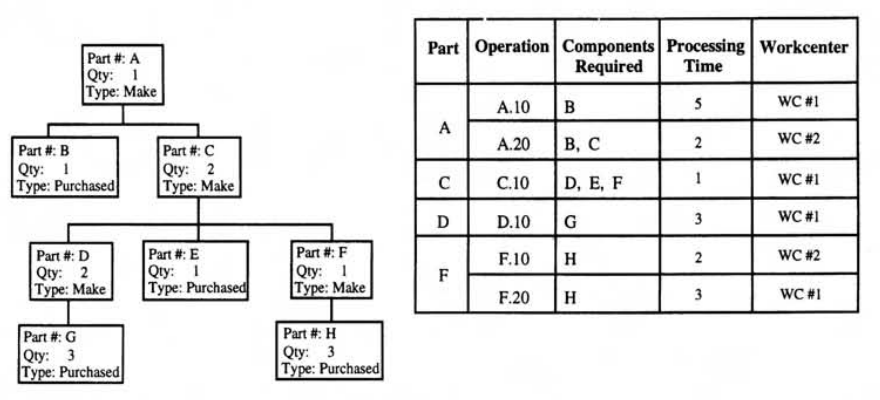

In [8]:
df = pd.DataFrame({
    "part": ['A', 'A', 'C', 'D', 'F', 'F'], 
    "operation": ['A.10', 'A.20', 'C.10', 'D.10', 'F.10', 'F.20'],
    'operation_id': [10, 20, 10, 10, 10, 20],
    "components_required": [['B'], ['B', 'C'], ['D', 'E', 'F'], ['G'], ['H'], ['H']],
    "processing_time": [5, 2, 1, 3, 2, 3],
    "workcenter": [1, 2, 1, 1, 2, 1]
})

display(df)

,part,operation,operation_id,components_required,processing_time,workcenter
0,A,A.10,10,[B],5,1
1,A,A.20,20,"[B, C]",2,2
2,C,C.10,10,"[D, E, F]",1,1
3,D,D.10,10,[G],3,1
4,F,F.10,10,[H],2,2
5,F,F.20,20,[H],3,1


# 2 Converting the BOM into an Operation Network

## 2.1 Using Adjacency List

### First Try

In [9]:
# adjacency_list = {}

# for i in range(len(df)):
#     parent = df.loc[i, 'operation']
#     children = df.loc[i, 'components_required']
#     print(f"parent: {parent}, children: {children}")
#     print(adjacency_list)
#     for child in children:
#         print(f"child: {child}")
#         if child in df['part'].unique():
#             df_operations = df.loc[df['part']==child]
#             df_operations = df_operations.sort_values(by='operation_id', ascending=False).reset_index()
#             print(child)
#             display(df_operations)
#             for operation_idx in range(len(df_operations)): 
#                 if parent not in adjacency_list.keys(): 
#                     adjacency_list[parent] = [child+"."+str(df_operations.loc[operation_idx, 'operation_id'])]
#                 else: 
#                     adjacency_list[parent].append(child+"."+str(df_operations.loc[operation_idx, 'operation_id'])) 

#         else: 
#             print(f"{child} is not in operation list")
#         print("")


#             # for operation_idx in range(len(df_operations)): 
#             #     components_required = df_operations.loc[operation_idx, 'components_required']
#             #     for component: 



In [10]:
# print(adjacency_list)

### Second Try

In [11]:
# adjacency_list = {}

# for i in range(len(df)):
#     parent = df.loc[i, 'operation']
#     children = df.loc[i, 'components_required']
#     print(f"parent: {parent}, children: {children}")
#     print(adjacency_list)
#     for child in children:
#         print(f"child: {child}")
#         if child in df['part'].unique():
#             df_operations = df.loc[df['part']==child]
#             df_operations = df_operations.sort_values(by='operation_id', ascending=False).reset_index()
#             print(child)
#             display(df_operations)
#             for operation_idx in range(len(df_operations)): 
#                 if operation_idx == 0: 
#                     child_name = child+"."+str(df_operations.loc[operation_idx, 'operation_id'])
#                     if parent not in adjacency_list.keys(): 
#                         adjacency_list[parent] = [child_name]
#                     else: 
#                         adjacency_list[parent].append(child_name) 
#                     previous_child_name = child_name
#                 else: 
#                     child_name = child+"."+str(df_operations.loc[operation_idx, 'operation_id'])
#                     if previous_child_name not in adjacency_list.keys(): 
#                         adjacency_list[previous_child_name] = [child_name]
#                     else: 
#                         adjacency_list[previous_child_name].append(child_name) 
#                     previous_child_name = child_name
#         # else: 
#         #     print(f"{child} is not in operation list")
#         print("")


#             # for operation_idx in range(len(df_operations)): 
#             #     components_required = df_operations.loc[operation_idx, 'components_required']
#             #     for component: 



In [12]:
# print(adjacency_list)

### Third Try

In [13]:
# adjacency_list = {}

# for i in range(len(df)):
#     parent = df.loc[i, 'operation']
#     children = df.loc[i, 'components_required']
#     print(f"parent: {parent}, children: {children}")
#     print(adjacency_list)
#     for child in children:
#         print(f"child: {child}")
#         if child in df['part'].unique():
#             df_operations = df.loc[df['part']==child]
#             df_operations = df_operations.sort_values(by='operation_id', ascending=False).reset_index()
#             display(df_operations)
#             for operation_idx in range(len(df_operations)): 
#                 if operation_idx == 0: 
#                     child_name = child+"."+str(df_operations.loc[operation_idx, 'operation_id'])
#                     print(f"child name: {child_name}")
#                     if child_name not in adjacency_list.keys(): 
#                         adjacency_list[child_name] = [parent]
#                     else: 
#                         adjacency_list[child_name].append(parent) 
#                     previous_child_name = child_name
#                 else: 
#                     child_name = child+"."+str(df_operations.loc[operation_idx, 'operation_id'])
#                     if child_name not in adjacency_list.keys(): 
#                         adjacency_list[child_name] = [previous_child_name]
#                     else: 
#                         adjacency_list[child_name].append(previous_child_name) 
#                     previous_child_name = child_name
#         # else: 
#         #     print(f"{child} is not in operation list")
#         print("")


#             # for operation_idx in range(len(df_operations)): 
#             #     components_required = df_operations.loc[operation_idx, 'components_required']
#             #     for component: 



In [14]:
# print(adjacency_list)

### Fourth Try

In [15]:
# adjacency_list = {}

# def add_edge(adjacency_list, start_v, end_v):
#     # check if edge already exists
#     if start_v in adjacency_list.keys():
#         if end_v in adjacency_list[start_v]:
#             return 
#     if start_vertex not in adjacency_list.keys():
#         adjacency_list[start_v] = [end_v]
#     else: 
#         adjacency_list[start_v].append(end_v)


# for i in range(len(df)):
#     successor = df.loc[i, 'operation']
#     predecessors = df.loc[i, 'components_required']
#     for predecessor in predecessors:
#         new = True
#         if predecessor in df['part'].unique():
#             df_operations = df.loc[df['part']==predecessor].copy(deep=True)
#             for _ in range(len(df_operations)):
#                 operation_idx = df_operations['operation_id'].idxmax()
#                 predecessor_name = predecessor+"."+str(df_operations['operation_id'][operation_idx])
#                 if new: 
#                     start_vertex, end_vertex = predecessor_name, successor
#                     new = False
#                 else: 
#                     start_vertex, end_vertex = predecessor_name, previous_predecessor_name
#                 add_edge(adjacency_list, start_vertex, end_vertex)

#                 # # old code
#                 # if start_vertex not in adjacency_list.keys():
#                 #     adjacency_list[start_vertex] = [end_vertex]
#                 # else: 
#                 #     adjacency_list[start_vertex].append(end_vertex)

#                 previous_predecessor_name = predecessor_name
#                 df_operations = df_operations.drop(operation_idx)




In [16]:
# # Optimized function to add edge
# def add_edge(adjacency_list, start_v, end_v):
#     if start_v in adjacency_list:
#         if end_v not in adjacency_list[start_v]:
#             adjacency_list[start_v].append(end_v)
#     else:
#         adjacency_list[start_v] = [end_v]

# adjacency_list = {}

# for i in range(len(df)):
#     successor_name = df.loc[i, 'operation']
#     predecessors = df.loc[i, 'components_required']
#     unique_parts = set(df['part'].unique())
    
#     for predecessor in predecessors:
#         new = True
#         if predecessor in unique_parts:
#             df_operations = df.loc[df['part'] == predecessor]
#             while not df_operations.empty:
#                 operation_idx = df_operations['operation_id'].idxmax()
#                 predecessor_name = f"{predecessor}.{df_operations.loc[operation_idx, 'operation_id']}"
#                 if new: 
#                     start_vertex, end_vertex = predecessor_name, successor_name
#                     new = False
#                 else: 
#                     start_vertex, end_vertex = predecessor_name, previous_predecessor_name
#                 add_edge(adjacency_list, start_vertex, end_vertex)
                
#                 previous_predecessor_name = predecessor_name
#                 df_operations = df_operations.drop(operation_idx)

#     df_operations = df.loc[df['part'] == predecessor]
    


# print(adjacency_list)


In [17]:
# unique_parts = set(df['part'].unique())
# for part in unique_parts: 
#     df_operations = df.loc[df['part'] == part]
#     unique_operations = df_operations['operation_id'].unique()
#     while len(df_operations) > 1:
#         operation_idx = df_operations['operation_id'].idxmax()
#         end_vertex = f"{part}.{df.loc[operation_idx, 'operation_id']}"
#         df_operations = df_operations.drop(operation_idx)
#         operation_idx = df_operations['operation_id'].idxmax()
#         start_vertex = f"{part}.{df.loc[operation_idx, 'operation_id']}"
#         add_edge(adjacency_list, start_vertex, end_vertex)

# print(adjacency_list)

## 2.2 Using OOP + Optimizing the Algorithm

In [18]:
# df = pd.DataFrame({
#     "part": ['A', 'A', 'C', 'D', 'F', 'F', 'F'], 
#     "operation": ['A.10', 'A.20', 'C.10', 'D.10', 'F.10', 'F.20', 'F.30'],
#     'operation_id': [10, 20, 10, 10, 10, 20, 30],
#     "components_required": [['B'], ['B', 'C'], ['D', 'E', 'F'], ['G'], ['H'], ['H'], ['H']],
#     "processing_time": [5, 2, 1, 3, 2, 3, 4],
#     "workcenter": [1, 2, 1, 1, 2, 1, 3]
# })

df = pd.DataFrame({
    "part": ['A', 'A', 'C', 'D', 'F', 'F'], 
    "operation": ['A.10', 'A.20', 'C.10', 'D.10', 'F.10', 'F.20'],
    'operation_id': [10, 20, 10, 10, 10, 20],
    "components_required": [['B'], ['B', 'C'], ['D', 'E', 'F'], ['G'], ['H'], ['H']],
    "processing_time": [5, 2, 1, 3, 2, 3],
    "workcenter": [1, 2, 1, 1, 2, 1]
})

df['predecessor_operations'] = None
for i in range(len(df)): 
    predecessors = df.loc[i, 'components_required']
    predecessor_operations = []
    for predecessor in predecessors: 
        if predecessor in df['part'].unique():
            predecessor_operations += df['operation'].loc[(df['part']==predecessor)].tolist()
    df.at[i, 'predecessor_operations'] = predecessor_operations
    # TODO: fix the predecessor_operation appendage for part C. 
    # operation F.20 (more final) should be appended to C instead of operation F.10
    # the code is currently unable to differentiate between F.10 and F.20 and takes the first available item

# display(df)

for part in df['part'].unique(): 
    df_operations = df.loc[df['part'] == part]
    while(len(df_operations)) > 1: 
        max_operation_idx_1 = df_operations['operation_id'].idxmax()
        df_operations = df_operations.drop(index=max_operation_idx_1)
        max_operation_idx_2 = df_operations['operation_id'].idxmax()
        predecessor_operation = df.loc[max_operation_idx_2, 'operation']
        df.at[max_operation_idx_1,'predecessor_operations'].append(predecessor_operation)
display(df)

g = Graph()
for i in range(len(df)):
    end_vertex = df.loc[i, 'operation']
    for predecessor in df.loc[i,'predecessor_operations']: 
        start_vertex = predecessor
        # print(f"{type(start_vertex)}, {type(end_vertex)}")
        # print(f"({start_vertex}, {end_vertex})")
        g.add_edge(start_vertex, end_vertex)

for vertex in g:
    print(vertex)

,part,operation,operation_id,components_required,processing_time,workcenter,predecessor_operations
0,A,A.10,10,[B],5,1,[]
1,A,A.20,20,"[B, C]",2,2,"[C.10, A.10]"
2,C,C.10,10,"[D, E, F]",1,1,"[D.10, F.10, F.20]"
3,D,D.10,10,[G],3,1,[]
4,F,F.10,10,[H],2,2,[]
5,F,F.20,20,[H],3,1,[F.10]


Vertex C.10 is connected to: A.20
Vertex A.20 is connected to: 
Vertex A.10 is connected to: A.20
Vertex D.10 is connected to: C.10
Vertex F.10 is connected to: C.10, F.20
Vertex F.20 is connected to: C.10


In [19]:
def process_df(df): 
    df['predecessor_operations'] = None
    for i in range(len(df)): 
        predecessors = df.loc[i, 'components_required']
        predecessor_operations = []
        for predecessor in predecessors: 
            if predecessor in df['part'].unique():
                predecessor_operations += df['operation'].loc[(df['part']==predecessor)].tolist()
        df.at[i, 'predecessor_operations'] = predecessor_operations
        # TODO: fix the predecessor_operation appendage for part C. 
        # operation F.20 (more final) should be appended to C instead of operation F.10
        # the code is currently unable to differentiate between F.10 and F.20 and takes the first available item

    # display(df)

    for part in df['part'].unique(): 
        df_operations = df.loc[df['part'] == part]
        while(len(df_operations)) > 1: 
            max_operation_idx_1 = df_operations['operation_id'].idxmax()
            df_operations = df_operations.drop(index=max_operation_idx_1)
            max_operation_idx_2 = df_operations['operation_id'].idxmax()
            predecessor_operation = df.loc[max_operation_idx_2, 'operation']
            df.at[max_operation_idx_1,'predecessor_operations'].append(predecessor_operation)
    return df

## 2.3 Test Cases

In [20]:
df = None
dict_df = {}
filepath = 'agrawal_test_set.xlsx'
excel_file = pd.ExcelFile(filepath)

for sheet_name in excel_file.sheet_names:
    dict_df[sheet_name] = pd.read_excel(filepath, sheet_name=sheet_name)

for df_key in dict_df: 
    # display(dict_df[df_key])
    df = process_df(dict_df[df_key])
    # print(dict_df[df_key])
    display(dict_df[df_key].head())
    g = Graph()
    for i in range(len(df)):
        end_vertex = df.loc[i, 'operation']
        for predecessor in df.loc[i,'predecessor_operations']: 
            start_vertex = predecessor
            g.add_edge(start_vertex, end_vertex)

,part,operation,operation_id,components_required,processing_time,workcenter,predecessor_operations
0,B,B.10,10,"[A, K]",2,WC#1,[]
1,C,C.10,10,"[B,D,K]",1,WC#1,[B.10]
2,E,E.10,10,"[C,L]",1,WC#2,"[C.10, L.10]"
3,F,F.10,10,"[C,G]",3,WC#2,[C.10]
4,H,H.10,10,"[E,F]",7,WC#3,"[E.10, F.10]"


,part,operation,operation_id,components_required,processing_time,workcenter,predecessor_operations
0,B,B.10,10,"[A,P]",2,WC#1,[]
1,C,C.10,10,[A],2,WC#4,[]
2,NaN,C.20,20,[A],6,WC#2,[]
3,D,D.10,10,[A],7,WC#3,[]
4,E,E.10,10,"[A,Q]",4,WC#1,[]


,part,operation,operation_id,components_required,processing_time,workcenter,predecessor_operations
0,B,B.10,10,"[A,Z]",5,WC#1,[]
1,C,C.10,10,[B],20,WC#2,[B.10]
2,E,E.10,10,"[C,D,F]",19,WC#3,"[C.10, F.10]"
3,F,F.10,10,[B],6,WC#3,[B.10]
4,G,G.10,10,"[E,AA]",15,WC#4,[E.10]


,part,operation,operation_id,components_required,processing_time,workcenter,predecessor_operations
0,P1,P1.10,10,"[A, B, C, D]",45,WC#1,[]
1,P2,P2.10,10,"[P1, E]",30,WC#2,[]
2,P3,P3.10,10,"[P2, F, G]",25,WC#3,[]
3,P4,P4.10,10,"[P3, H, I, J]",40,WC#1,[]
4,P5,P5.10,10,"[P4, K, L]",55,WC#2,[]


,part,operation,operation_id,components_required,processing_time,workcenter,predecessor_operations
0,Lasagna,Lasagna.10,10,"[Tomato Sauce, Cheese, Noodles, Ground Beef, B...",45,WC#4,[]
1,Tomato Sauce,Tomato Sauce.10,10,"[Tomatoes, Olive Oil, Garlic]",20,WC#1,[]
2,Cheese,Cheese.10,10,"[Milk, Rennet]",30,WC#2,[]
3,Noodles,Noodles.10,10,"[Flour, Eggs, Salt]",25,WC#3,[]
4,Ground Beef,Ground Beef.10,10,"[Beef, Seasoning]",15,WC#2,[]


# 3. LETSA

[<__main__.Operation object at 0x0000020F64A02950>, <__main__.Operation object at 0x0000020F647058D0>, <__main__.Operation object at 0x0000020F63EA5910>]
Operation B.10: Start Time = 18, End Time = 20
Operation C.10: Start Time = 17, End Time = 18
Operation F.10: Start Time = 14, End Time = 17


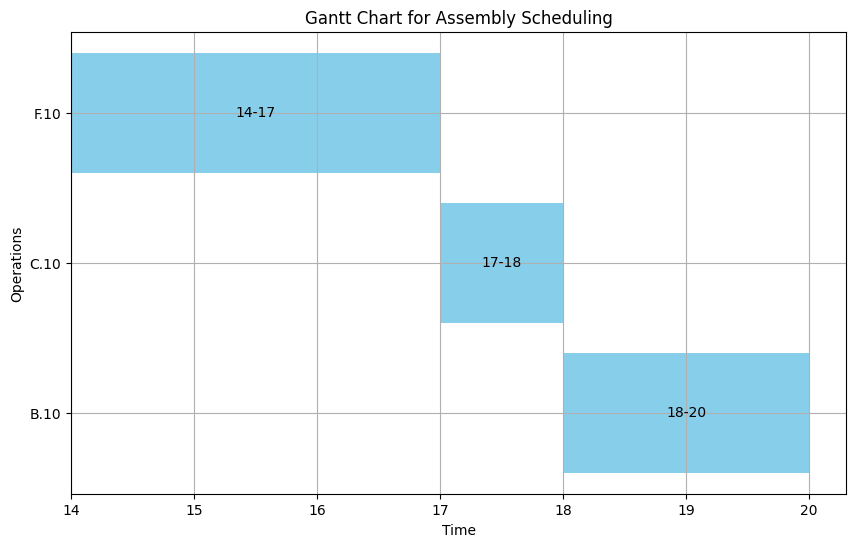

[<__main__.Operation object at 0x0000020F64AF01D0>, <__main__.Operation object at 0x0000020F6441BF10>, <__main__.Operation object at 0x0000020F63E66110>, <__main__.Operation object at 0x0000020F64B1AF50>, <__main__.Operation object at 0x0000020F64B02F90>, <__main__.Operation object at 0x0000020F64B20410>, <__main__.Operation object at 0x0000020F64ABDFD0>, <__main__.Operation object at 0x0000020F645C2250>, <__main__.Operation object at 0x0000020F64AC0550>, <__main__.Operation object at 0x0000020F64ABFF90>, <__main__.Operation object at 0x0000020F62AFC9D0>, <__main__.Operation object at 0x0000020F64ABC610>, <__main__.Operation object at 0x0000020F64ABDA10>, <__main__.Operation object at 0x0000020F64ABF350>, <__main__.Operation object at 0x0000020F64A07AD0>]
Operation D.10: Start Time = 10, End Time = 17
Operation C.20: Start Time = 12, End Time = 18
Operation E.10: Start Time = 12, End Time = 16
Operation O.10: Start Time = 2, End Time = 6
Operation F.10: Start Time = 12, End Time = 15
O

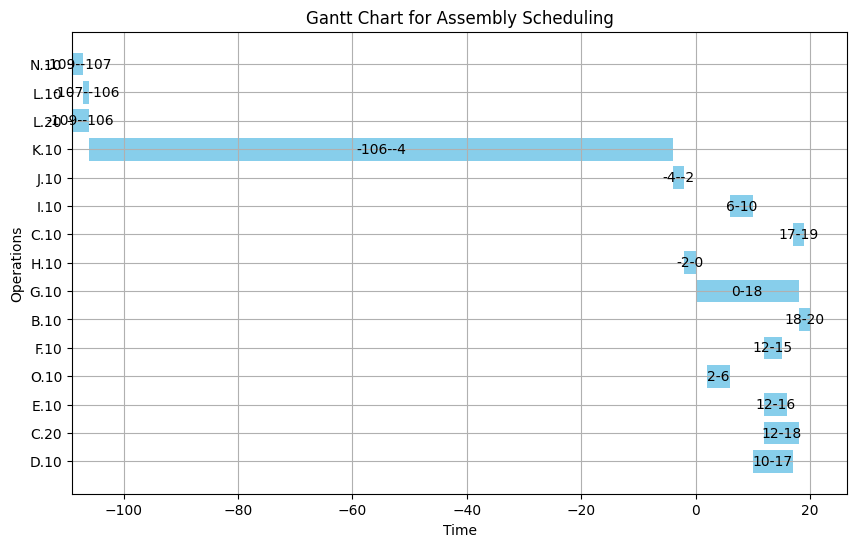

[<__main__.Operation object at 0x0000020F66E017D0>, <__main__.Operation object at 0x0000020F64B204D0>, <__main__.Operation object at 0x0000020F64B81E10>, <__main__.Operation object at 0x0000020F64B20610>, <__main__.Operation object at 0x0000020F64B20490>, <__main__.Operation object at 0x0000020F66DFA790>, <__main__.Operation object at 0x0000020F64B7E5D0>, <__main__.Operation object at 0x0000020F66E01F90>, <__main__.Operation object at 0x0000020F64B7ED90>, <__main__.Operation object at 0x0000020F64B8B7D0>, <__main__.Operation object at 0x0000020F64B7F950>, <__main__.Operation object at 0x0000020F64B88D10>, <__main__.Operation object at 0x0000020F66E03350>, <__main__.Operation object at 0x0000020F64B8B1D0>, <__main__.Operation object at 0x0000020F66E029D0>, <__main__.Operation object at 0x0000020F66E01ED0>, <__main__.Operation object at 0x0000020F64B883D0>, <__main__.Operation object at 0x0000020F66E02FD0>]
Operation V.10: Start Time = -14, End Time = 5
Operation B.10: Start Time = 15, E

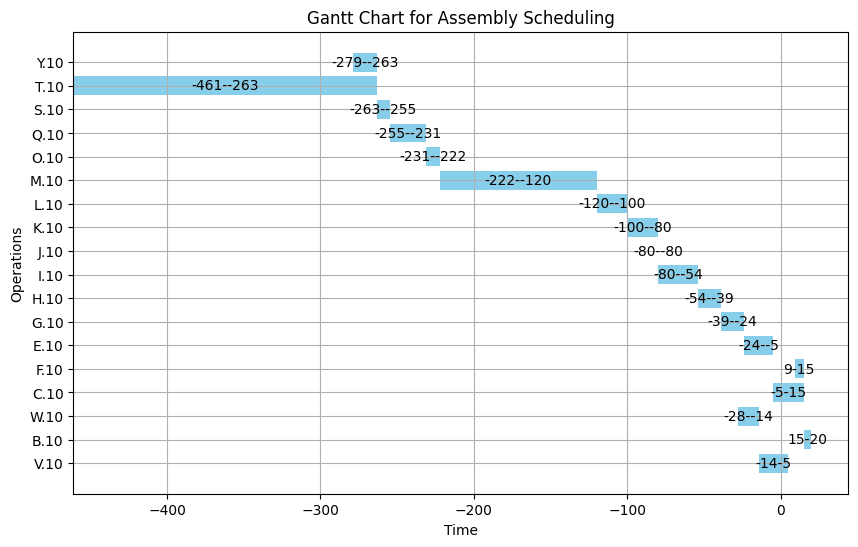

[<__main__.Operation object at 0x0000020F66E63050>, <__main__.Operation object at 0x0000020F64AE9710>, <__main__.Operation object at 0x0000020F64AF3C90>, <__main__.Operation object at 0x0000020F66E16D90>, <__main__.Operation object at 0x0000020F66E1DB50>, <__main__.Operation object at 0x0000020F66DF8490>, <__main__.Operation object at 0x0000020F66E1F3D0>, <__main__.Operation object at 0x0000020F64B8B6D0>, <__main__.Operation object at 0x0000020F64AC0A10>, <__main__.Operation object at 0x0000020F66E1E690>, <__main__.Operation object at 0x0000020F66E6E390>, <__main__.Operation object at 0x0000020F66E630D0>, <__main__.Operation object at 0x0000020F66E1E5D0>, <__main__.Operation object at 0x0000020F66E60E90>, <__main__.Operation object at 0x0000020F66E15A10>, <__main__.Operation object at 0x0000020F66E62F50>, <__main__.Operation object at 0x0000020F64AEBAD0>, <__main__.Operation object at 0x0000020F66E1C490>, <__main__.Operation object at 0x0000020F64B3F550>, <__main__.Operation object at 

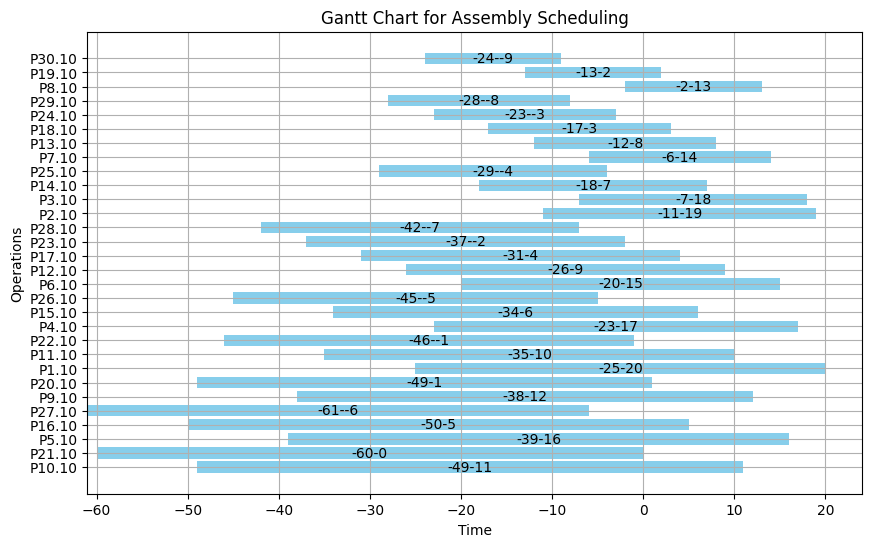

[<__main__.Operation object at 0x0000020F670F6450>, <__main__.Operation object at 0x0000020F673DBCD0>, <__main__.Operation object at 0x0000020F671639D0>, <__main__.Operation object at 0x0000020F64AE01D0>, <__main__.Operation object at 0x0000020F66E7EF90>, <__main__.Operation object at 0x0000020F6718BD90>, <__main__.Operation object at 0x0000020F67132250>, <__main__.Operation object at 0x0000020F67192590>, <__main__.Operation object at 0x0000020F67163E50>, <__main__.Operation object at 0x0000020F673D94D0>, <__main__.Operation object at 0x0000020F66EC7F10>, <__main__.Operation object at 0x0000020F6718ABD0>, <__main__.Operation object at 0x0000020F66ED87D0>, <__main__.Operation object at 0x0000020F673DB6D0>, <__main__.Operation object at 0x0000020F673DBE50>, <__main__.Operation object at 0x0000020F66EDA4D0>, <__main__.Operation object at 0x0000020F66EBF250>, <__main__.Operation object at 0x0000020F64B09F90>, <__main__.Operation object at 0x0000020F64B0BAD0>, <__main__.Operation object at 

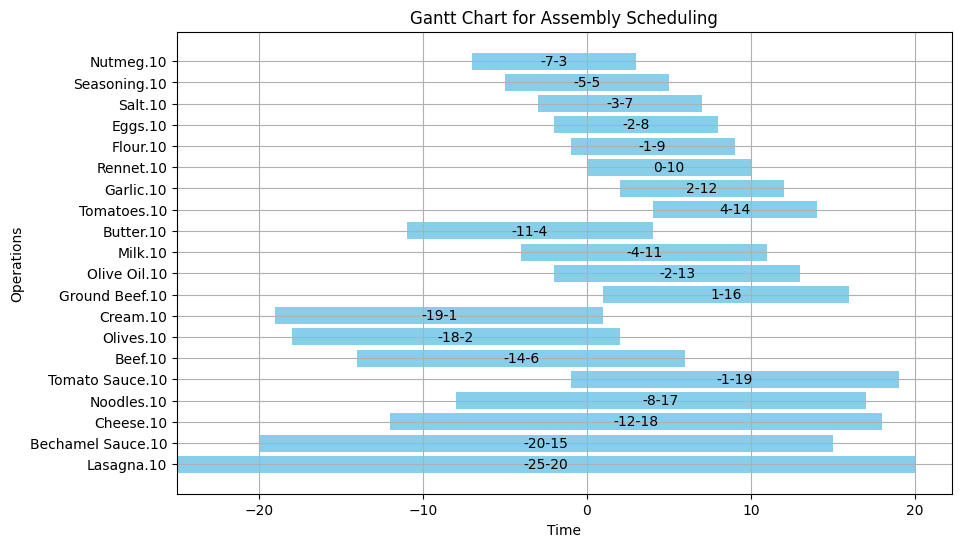

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

class Operation:
    def __init__(self, id, processing_time, workcenter, successors=None):
        self.id = id
        self.processing_time = processing_time
        self.workcenter = workcenter
        self.successors = successors if successors else []
        self.start_time = None
        self.end_time = None
        self.scheduled = False

def find_critical_path(operations, operation_ids):
    """
    Finds the critical path among the feasible operations.
    Inputs:
        - operations                    : dictionary {operation_id: Operation()}, a dictionary of all operations.
        - operation_ids                 : list[operation_id],  a list of operation IDs that are currently feasible.
    Output:
        - (critical_path, path_length)  : tuple, containing the critical path (list of operation IDs) and the length of the critical path.
    """

    paths = []
    def dfs(operation_id, current_path, current_length):
        """
        Performs depth-first-search in a given operation network using recursion.
        Inputs: 
            - operation_id          : str, id of the operation to begin DFS at
            - current_path          : list [str], The path of operation IDs visited so far
            - current_length        : float - The cumulative processing time along the current path
        Output:
            - None - The function modifies the 'paths' list in place, adding tuples of (path, length) for each terminal path found.
        Explanation:
            - This function recursively traverses the operation network starting from the given operation_id.
            - It explores all successors of the current operation, appending the current operation to the path and adding its processing time to the cumulative length.
            - If an operation has no successors, it adds the complete path and its length to the 'paths' list.
        """

        operation = operations[operation_id]
        # If the operation has a successor, add to path
        # Otherwise, perform forward recursive DFS on each of the operation's successor to explore all possible paths
        if not operation.successors:
            paths.append((current_path + [operation_id], current_length + operation.processing_time))
        else:
            for succ_id in operation.successors:
                dfs(succ_id, current_path + [operation_id], current_length + operation.processing_time)

    # For every operation, perform DFS
    for op_id in operation_ids:
        dfs(op_id, [], 0)
    return max(paths, key=lambda x: x[1])

def schedule_operations(operations, due_dates):
    """
    Solves the assembly scheduling problem (ASP) using the Longest End Time Scheduling Algorithm (LETSA).
    Inputs:
        - operations            : dictionary {operation_id: Operation()}, a dictionary of all operations.
        - due_dates             : dictionary {operation_id: int}, a dictionary of due dates for each operation.
    Output:
        - scheduled_operations  : list [Operation()], a list of Operation objects with start and end time schedules.
    """

    scheduled_operations = []
    while True:
        # Feasible operations = every operation that is (1) not scheduled, and (2) has all successors scheduled
        feasible_operations = [op_id for op_id, op in operations.items() if not op.scheduled and all(operations[succ_id].scheduled for succ_id in op.successors)]
        if not feasible_operations:
            break

        # Compute critical path only for feasible operations
        critical_path, _ = find_critical_path(operations, feasible_operations)
        operation_id = critical_path[0]
        operation = operations[operation_id]

        # Set completion/end time of the selected operation as
            # the start time of the successor, if a successor exists
            # the project deadline, otherwise 
        if operation.successors:
            operation.end_time = min(operations[succ_id].start_time for succ_id in operation.successors)
        else:
            operation.end_time = due_dates[operation.id]

        # Set start time of selected operation
        operation.start_time = operation.end_time - operation.processing_time
        operation.scheduled = True
        scheduled_operations.append(operation)
        
    return scheduled_operations

def plot_gantt_chart(scheduled_operations):
    """
    Plots a Gantt chart for the scheduled operations.
    Inputs:
        - scheduled_operations      : list Operation(), a list of scheduled Operation objects.
    Output:
        - None 
        - Displays a Gantt chart.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    for op in scheduled_operations:
        ax.barh(op.id, op.processing_time, left=op.start_time, color='skyblue')
        ax.text(op.start_time + op.processing_time / 2, op.id, f'{op.start_time}-{op.end_time}', ha='center', va='center', color='black')

    ax.set_xlabel('Time')
    ax.set_ylabel('Operations')
    ax.set_title('Gantt Chart for Assembly Scheduling')
    plt.grid(True)
    plt.show()

def load_operations_from_df(df):
    """
    Loads operations from a DataFrame and creates Operation objects.    
    Inputs:
        - df: pandas DataFrame - A DataFrame containing BOM information with columns 
          ['part', 'operation', 'operation_id', 'components_required', 'processing_time', 'workcenter', 'predecessor_operations'].
    Output:
        - operations: dictionary, {operation_id: Operation()} - A dictionary of Operation objects.
    """
    operations = {}
    for idx, row in df.iterrows():
        operation_id = row['operation']
        successors = row['predecessor_operations']
        operations[operation_id] = Operation(operation_id, row['processing_time'], row['workcenter'], successors)
    return operations

def load_due_dates(df):
    """
    Generates due dates for each operation.    
    Inputs:
        - df: pandas DataFrame - A DataFrame containing BOM information.
    Output:
        - due_dates: dictionary, {operation_id: int} - A dictionary of due dates for each operation.
    """
    due_dates = {}
    for idx, row in df.iterrows():
        operation_id = row['operation']
        # Example due date assignment, this should be adjusted as per actual due dates
        due_dates[operation_id] = 20 - idx  # Example: descending due dates
    return due_dates


for df_key in dict_df.keys():
    df = dict_df[df_key]
    operations = load_operations_from_df(df)
    due_dates = load_due_dates(df)

    scheduled_operations = schedule_operations(operations, due_dates)
    print(scheduled_operations)
    for op in scheduled_operations:
        print(f"Operation {op.id}: Start Time = {op.start_time}, End Time = {op.end_time}")

    plot_gantt_chart(scheduled_operations)
